# Convolution of the flux and interaction cross-section

Miscellaneous:

In [37]:
import sys

sys.path.append("../../..")

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc


To make plots more beautiful

In [38]:
rc("figure", figsize=(10, 5))
# rc('lines', linewidth=2)
rc("axes", labelsize=12, linewidth=1, grid=True, labelpad=-1)
rc("axes.spines", right=True)
rc("xtick", direction="in", labelsize=12, top=True)
rc("xtick.major", width=0.8, size=5)
rc("ytick", direction="in", labelsize=12, right=True)
rc("ytick.major", width=0.8, size=5)
rc("legend", fancybox=False, fontsize=12, shadow=False)
rc(
    "grid",
    linewidth=1.0,
)  # ls='dotted')
# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

<p> </p>
Defining a $\texttt{pandas dataframe}$:

In [39]:
df = pd.read_csv(
    "t2kflux_2020_plus250kA_runcond_sk.csv",
    delimiter=",",
    usecols=(lambda x: x != "Bin#"),
)
df = df.rename(columns={"anti-numu": "antinumu", "anti-nue": "antinue"})
df.head()

,minE,maxE,numu,antinumu,nue,antinue
0,0.00,0.01,846.0,869.0,9.31,2.29
1,0.01,0.02,5030.0,5770.0,56.70,11.20
2,0.02,0.03,11200.0,13900.0,139.00,25.80
3,0.03,0.04,18500.0,24100.0,261.00,42.50
4,0.04,0.05,26100.0,35300.0,407.00,61.50


In [40]:
df.describe()

,minE,maxE,numu,antinumu,nue,antinue
count,138.000000,138.000000,1.380000e+02,138.000000,138.000000,138.000000
mean,3.777174,3.994565,3.680769e+05,19030.698036,2822.533743,302.409399
std,7.011859,7.350760,4.215915e+05,14333.525107,2192.361974,203.314743
min,0.000000,0.010000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.342500,0.352500,1.037500e+04,2195.000000,436.750000,87.050000
50%,0.685000,0.695000,1.580000e+05,25200.000000,3130.000000,363.000000
75%,2.375000,2.550000,6.715000e+05,28975.000000,4990.000000,500.250000
max,29.000000,30.000000,1.220000e+06,55600.000000,5700.000000,529.000000


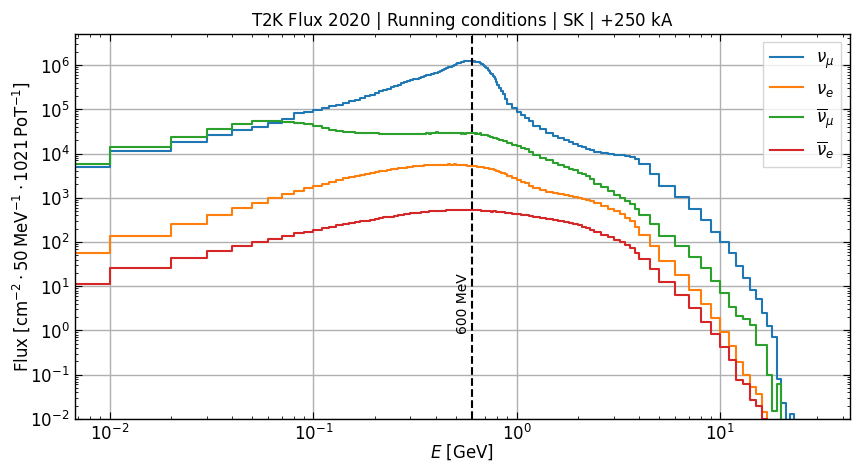

In [69]:
plt.step(df.minE, df.numu, label=r"$\nu_\mu$")
plt.step(df.minE, df.nue, label=r"$\nu_e$")
plt.step(df.minE, df.antinumu, label=r"$\overline{\nu}_\mu$")
plt.step(df.minE, df.antinue, label=r"$\overline{\nu}_e$")
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.5, 1), fontsize=10, rotation=90)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(
    r"Flux [$\text{cm}^{-2}\cdot 50\,\text{MeV}^{-1} \cdot 1021\,\text{PoT}^{-1}$]"
)
plt.ylim(bottom=1e-2)
plt.title(r"T2K Flux 2020 | Running conditions | SK | $+250$ kA")
plt.legend()

plt.show()

In [42]:
df = df.assign(total=lambda df: df.numu + df.nue + df.antinumu + df.antinue)

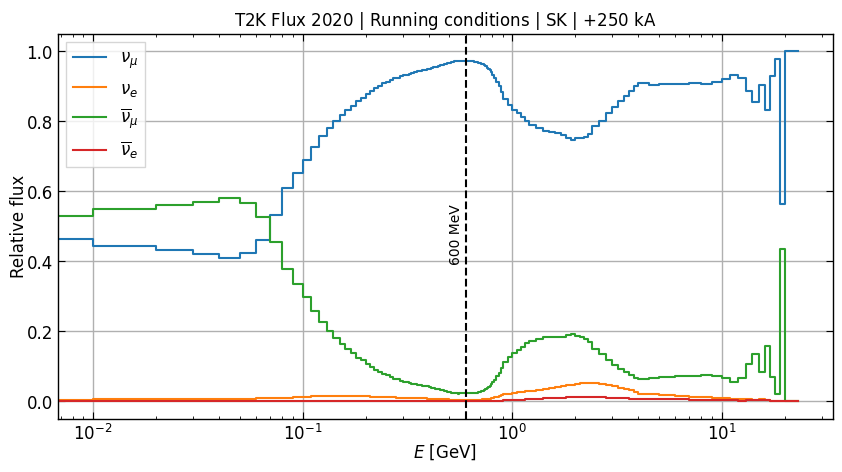

In [66]:
plt.step(df.minE, df.numu / df.total, label=r"$\nu_\mu$")
plt.step(df.minE, df.nue / df.total, label=r"$\nu_e$")
plt.step(df.minE, df.antinumu / df.total, label=r"$\overline{\nu}_\mu$")
plt.step(df.minE, df.antinue / df.total, label=r"$\overline{\nu}_e$")
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.5, 4e-1), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale('log')
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"Relative flux")
# plt.ylim(bottom=1e-4)
plt.title(r"T2K Flux 2020 | Running conditions | SK | $+250$ kA")
plt.legend()

plt.show()